In [3]:
from pandas import read_excel, read_csv

In [68]:
# Read DataFrame from Excel file
df = read_excel('gantt.xlsx',
#                 sheet_name='Sheet1'
               )
df

,Task,Start,Finish,complete
0,automate report,2020-07-19,2020-07-31,70
1,folder clean up,2020-07-10,2020-07-25,70
2,create presentation,2020-07-04,2020-08-04,90
3,send out report,2020-07-18,2020-07-25,30


In [7]:
# df.columns

Index(['task ', 'start', 'finish', 'complete'], dtype='object')

# Primera manera: plotly express

In [4]:
import plotly.express as px

In [10]:
import plotly

In [23]:
# Assign columns to variables. This step is unnecessary.
tasks = df['Task']
start = df['Start']
finish = df['Finish']
complete = df['complete']

In [26]:
# Create Gantt chart
fig = px.timeline(df, x_start=start, x_end=finish, y=tasks, color=complete, title='Task Overview',
                  color_continuous_scale=px.colors.sequential.Viridis,
#                   color_continuous_scale=[(0, 'red'), (0.5, 'yellow'), (1, 'green')]
                 )

In [29]:
# Create Gantt chart. The argument df seems to be unnecessary.
fig = px.timeline(x_start=df['Start'], x_end=df['Finish'], y=df['Task'], color=df['complete'], title='Task Overview',
#                   color_continuous_scale=px.colors.sequential.Viridis,
                  color_continuous_scale=[(0, 'red'), (0.5, 'yellow'), (1, 'green')]
                 )

In [69]:
# But, if the argument df is passed, we can simply do the following.
fig = px.timeline(df, x_start='Start', x_end='Finish', y='Task', color='complete', title='Task overview')

In [70]:
fig.show()

In [42]:
# Update/change layout
fig.update_yaxes(autorange='reversed')  # To make sure that the task that was put in the top of the Excel file is also plotted on top of the chart.
fig.update_layout(font_size=18, title_font_size=42, title_font_family='Georgia')

In [28]:
# Save graph and export to HTML
plotly.offline.plot(fig, filename='gantt.html')

'gant.html'

# Segunda manera: plotly express - create_gantt()

In [20]:
# Interactive chart
import plotly.figure_factory as ff

WARNING. The create_gantt function is deprecated!

In [71]:
fig_inter = ff.create_gantt(df, colors='Viridis', index_col='complete', show_colorbar=True, title='Task Overview')
fig_inter

In [74]:
colors = {30: 'rgb(220, 0, 0)', 70: (1, 0.9, 0.16), 75: (1, 0.9, 0.22), 90: 'rgb(0, 255, 100)'}
fig_inter = ff.create_gantt(df, colors=colors, index_col='complete', show_colorbar=True, group_tasks=True, title='Task Overview')
fig_inter

In [44]:
plotly.offline.plot(fig_inter, filename='gantt_int.html')

'gantt_int.html'

# Tercera manera: matplotlib

In [1]:
import matplotlib.pyplot as plt

## Ejemplo 1

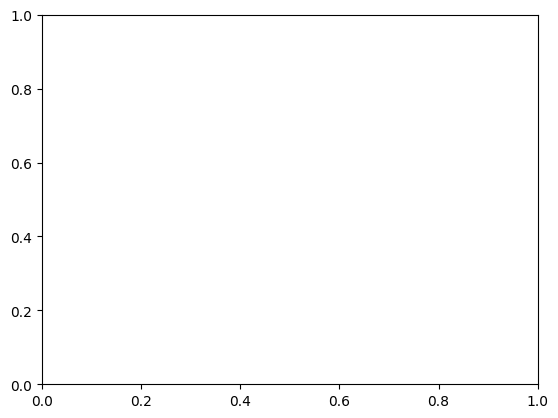

In [46]:
fig, gnt = plt.subplots()

In [47]:
gnt.set_xlim(0, 160)
gnt.set_ylim(0, 50)

gnt.set_xlabel('seconds since start')
gnt.set_ylabel('Processor')

gnt.set_yticks([15, 25, 35])
gnt.set_yticklabels(['1', '2', '3'])

gnt.grid(True)

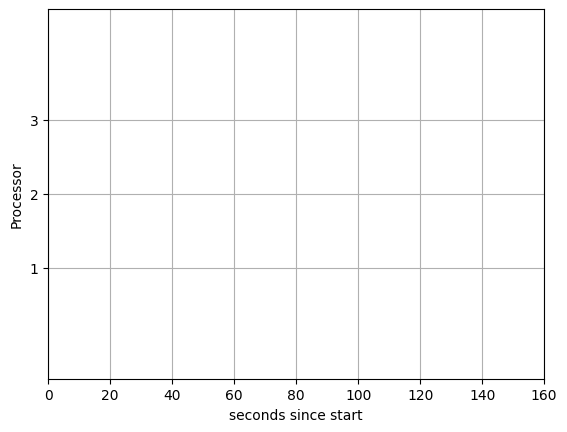

In [49]:
fig

In [51]:
# Here, we added a bar in the chart. In this example, this bar represent the operation going on for time 40 to (40+50)= 90 sec.

gnt.broken_barh([(30, 50)], (30, 9), facecolors=('tab:orange'))
gnt.broken_barh([(110, 10), (150, 10)], (10, 9), facecolors=('tab:blue'))
gnt.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9), facecolors=('tab:red'))

In [ ]:
# The basic arguments : 
# gnt.broken_barh([(start_time, duration)],
#                  (lower_yaxis, height),
#                  facecolors=('tab:colours'))

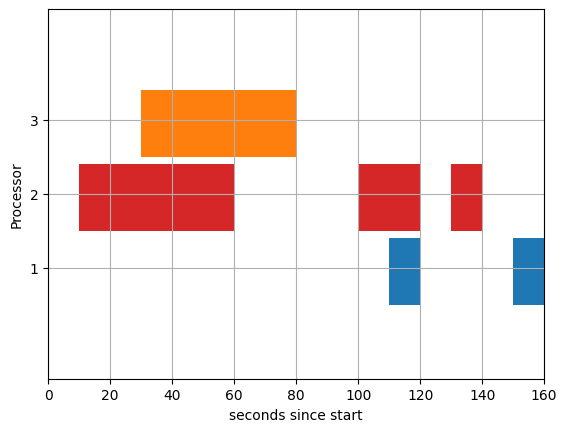

In [52]:
fig

In [55]:
plt.savefig('gantt_matplotlib.png')

<Figure size 640x480 with 0 Axes>

## Ejemplo 2

In [13]:
from pandas import to_datetime
from datetime import timedelta

In [5]:
df = read_csv('gantt.csv', sep=';')
df

,task,start,end,department,completion
0,task1,14-Jun-2021,18-Jun-2021,Adam,100
1,task2,16-Jun-2021,24-Jun-2021,Pablo,100
2,task3,18-Jun-2021,22-Jun-2021,Pablo,100
3,task4,22-Jun-2021,25-Jun-2021,Adam,90
4,task5,22-Jun-2021,30-Jun-2021,Carlos,60


In [165]:
###### PRE-PROCESSING THE DATA ######

#Convert dates to datetime format
df.start = to_datetime(df.start)
df.end = to_datetime(df.end)

#Add Duration
df['duration'] = df.end - df.start
df['dur'] = df.duration.apply(lambda x: x.days + 1)

#Sort in ascending order of start date
df = df.sort_values(by='start', ascending=True)

#Project level variables
project_start = df.start.min()
project_end = df.end.max()
project_duration = (project_end - project_start).days + 1

#Add relative date
df['rel_start'] = df.start.apply(lambda x: (x - project_start).days)

#Create custom x-ticks and x-tick labels
x_ticks = list(range(project_duration+1))  # [i for i in range(project_duration+1)]
x_labels = [(project_start + timedelta(days=i)).strftime('%d-%b') for i in x_ticks]

df

,task,start,end,department,completion,duration,dur,rel_start,w_comp,color
0,task1,2021-06-14,2021-06-18,Adam,100,4 days,5,0,5.0,#E64646
1,task2,2021-06-16,2021-06-24,Pablo,100,8 days,9,2,9.0,#E69646
2,task3,2021-06-18,2021-06-22,Pablo,100,4 days,5,4,5.0,#E69646
3,task4,2021-06-22,2021-06-25,Adam,90,3 days,4,8,3.6,#E64646
4,task5,2021-06-22,2021-06-30,Carlos,60,8 days,9,8,5.4,#34D05C


In [166]:
x_ticks

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

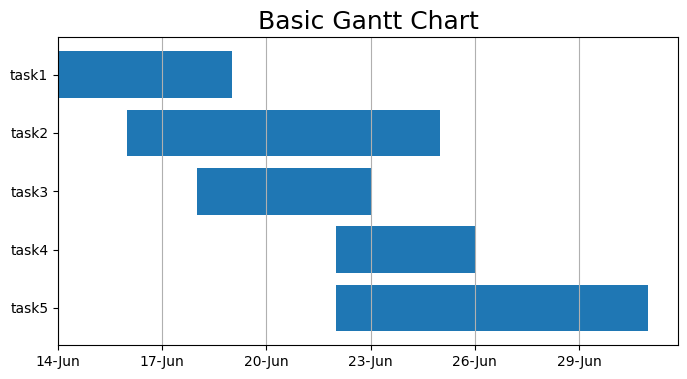

In [44]:
######  PLOTTING GANTT CHART ######
plt.figure(figsize=(8, 4))
plt.title('Basic Gantt Chart', size=18)
plt.barh(y=df.task, left=df.rel_start, width=df.dur)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
# plt.show()

**Adding Percentage Completion**

Percentage completion can be conveyed by overlaying a darker bar (which indicates completed portion of the task) on top of a lighter bar (which indicated the entire task).

We have already calculated the width of the bars which is duration in days. We have to calculate the width of completed portion of the task which is named as ‘w_comp’ as below.

In [45]:
df['w_comp'] = round(df.completion * df.dur / 100, 2)
df

,task,start,end,department,completion,duration,dur,rel_start,w_comp
0,task1,2021-06-14,2021-06-18,Adam,100,4 days,5,0,5.0
1,task2,2021-06-16,2021-06-24,Pablo,100,8 days,9,2,9.0
2,task3,2021-06-18,2021-06-22,Pablo,100,4 days,5,4,5.0
3,task4,2021-06-22,2021-06-25,Adam,90,3 days,4,8,3.6
4,task5,2021-06-22,2021-06-30,Carlos,60,8 days,9,8,5.4


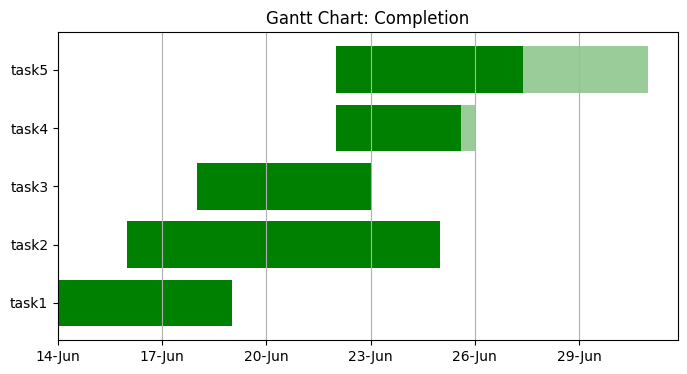

In [65]:
#Light and dark bar charts can be added by changing the alpha parameter.
plt.figure(figsize=(8, 4))
plt.title('Gantt Chart: Completion')
plt.barh(y=df.task, left=df.rel_start, width=df.dur, color='green', alpha=0.4) #Light bar for entire task
plt.barh(y=df.task, left=df.rel_start, width=df.w_comp, color='green', alpha=1) #Darker bar for completed part
plt.gca().invert_yaxis
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

**Adding Color Based on Sub-Category**

The tasks can be categorized based on department. There are three departments.
The chart will be more readable if the tasks are color coded based on the departments.

For this purpose, a dictionary is created which assign different color the each department.

In [145]:
colors = {'Adam':'#cf0000', 'Pablo':'darkgreen', 'Carlos':'darkblue'}

In [146]:
df['color'] = df.department.apply(lambda x: colors[x])
df

,task,start,end,department,completion,duration,dur,rel_start,w_comp,color
0,task1,2021-06-14,2021-06-18,Adam,100,4 days,5,0,5.0,#cf0000
1,task2,2021-06-16,2021-06-24,Pablo,100,8 days,9,2,9.0,darkgreen
2,task3,2021-06-18,2021-06-22,Pablo,100,4 days,5,4,5.0,darkgreen
3,task4,2021-06-22,2021-06-25,Adam,90,3 days,4,8,3.6,#cf0000
4,task5,2021-06-22,2021-06-30,Carlos,60,8 days,9,8,5.4,darkblue


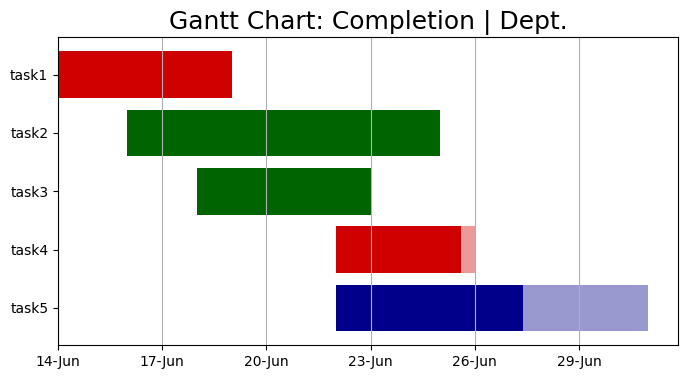

In [147]:
plt.figure(figsize=(8,4))
plt.title('Gantt Chart: Completion | Dept.', size=18)
# for i in range(df.shape[0]):
#     color=colors[df.department[i]]
#     plt.barh(y=df.task[i], left=df.rel_start[i], width=df.dur[i], alpha=0.4, color=color)
#     plt.barh(y=df.task[i], left=df.rel_start[i], width=df.w_comp[i], alpha=1, color=color)
plt.barh(y=df.task, left=df.rel_start, width=df.dur, alpha=0.4, color=df.color)
plt.barh(y=df.task, left=df.rel_start, width=df.w_comp, alpha=1, color=df.color)
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

**Adding Completion Percentage and Legends**

Completion percentage can be added to the chart by using text() function in pyplot. However, this function requires x and y coordinates of the text. Since y axis contains the Task names which is non-numeric, a list of numeric ticks has to be used instead of the Task names. New y-ticks can be generated similar to x-ticks as below.

In [73]:
yticks = list(range(len(df.task)))
yticks

[0, 1, 2, 3, 4]

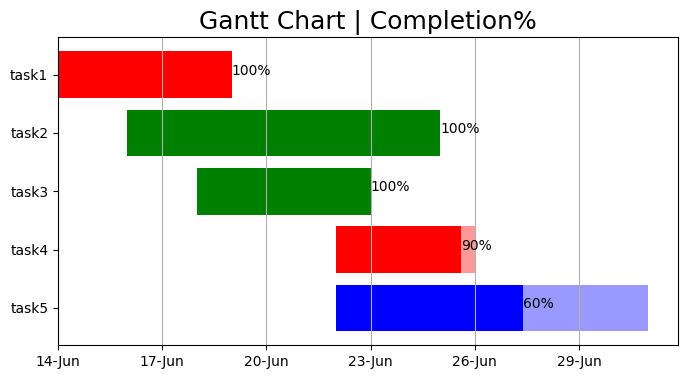

In [95]:
plt.figure(figsize=(8,4))
plt.title('Gantt Chart | Completion%', size=18)
for i in range(df.shape[0]):
    color=colors[df.department[i]]
    plt.barh(y=df.task[i], left=df.rel_start[i], width=df.dur[i], alpha=0.4, color=color)
    plt.barh(y=df.task[i], left=df.rel_start[i], width=df.w_comp[i], alpha=1, color=color)
    plt.text(x=df.rel_start[i]+df.w_comp[i], y=yticks[i], s=f'{df.completion[i]}%')
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3])
plt.grid(axis='x')
plt.show()

To display labels in the legend, label has to be added to each bar which is the name of the Department.

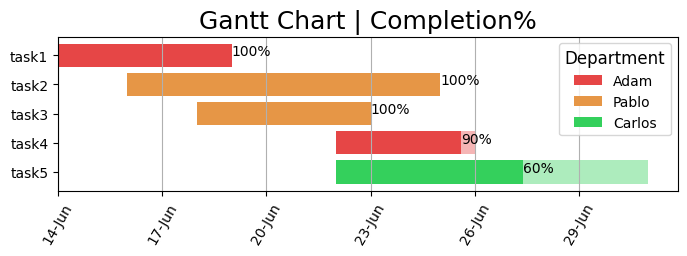

In [161]:
plt.figure(figsize=(8,2))
plt.title('Gantt Chart | Completion%', size=18)
for i in range(df.shape[0]):
    color=colors[df.department[i]]
    plt.barh(y=yticks[i], left=df.rel_start[i], width=df.dur[i], alpha=0.4, color=color)
    plt.barh(y=yticks[i], left=df.rel_start[i], width=df.w_comp[i], alpha=1, color=color, label=df.department[i])
    plt.text(x=df.rel_start[i]+df.w_comp[i], y=yticks[i], s=f'{df.completion[i]}%')
plt.gca().invert_yaxis()
plt.xticks(ticks=x_ticks[::3], labels=x_labels[::3], rotation=60)
plt.yticks(ticks=yticks, labels=df.task)
plt.grid(axis='x')
handles, labels = plt.gca().get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list, fontsize='medium', title='Department', title_fontsize='large')
plt.show()

## Ejemplo 3

Se usa el mismo df que en el ejemplo anterior.

In [162]:
from matplotlib.patches import Patch
from pandas import date_range

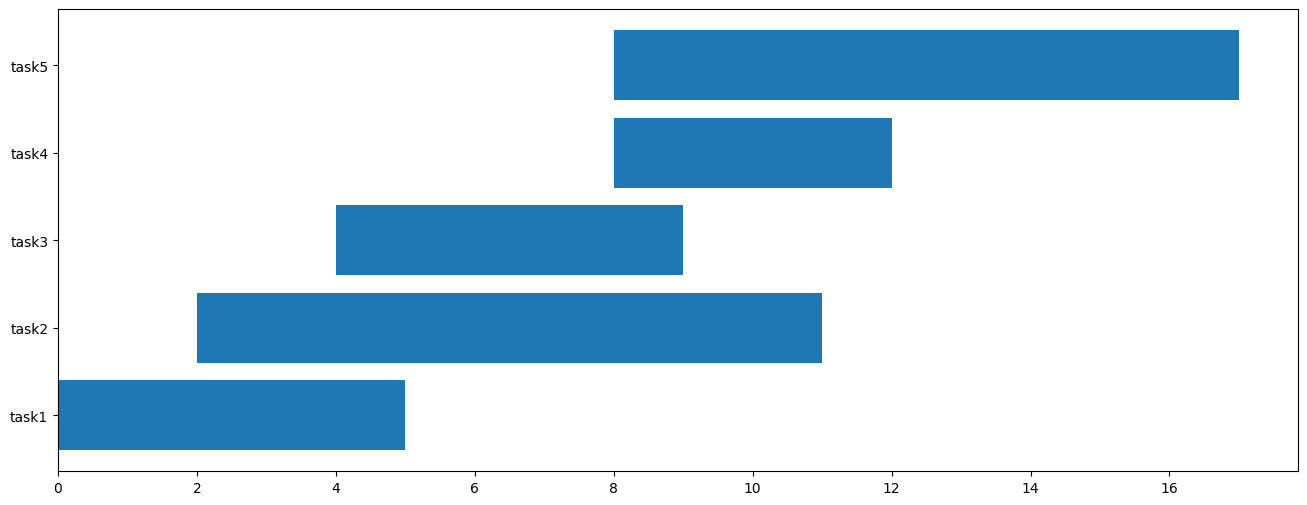

In [148]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(y=df.task, left=df.rel_start, width=df.dur)
plt.show()

In [149]:
def color(row):
    colors={'Adam':'#E64646', 'Pablo':'#E69646', 'Carlos':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
    return colors[row.department]

In [154]:
df['color'] = df.apply(color, axis='columns')
df

,task,start,end,department,completion,duration,dur,rel_start,w_comp,color
0,task1,2021-06-14,2021-06-18,Adam,100,4 days,5,0,5.0,#E64646
1,task2,2021-06-16,2021-06-24,Pablo,100,8 days,9,2,9.0,#E69646
2,task3,2021-06-18,2021-06-22,Pablo,100,4 days,5,4,5.0,#E69646
3,task4,2021-06-22,2021-06-25,Adam,90,3 days,4,8,3.6,#E64646
4,task5,2021-06-22,2021-06-30,Carlos,60,8 days,9,8,5.4,#34D05C


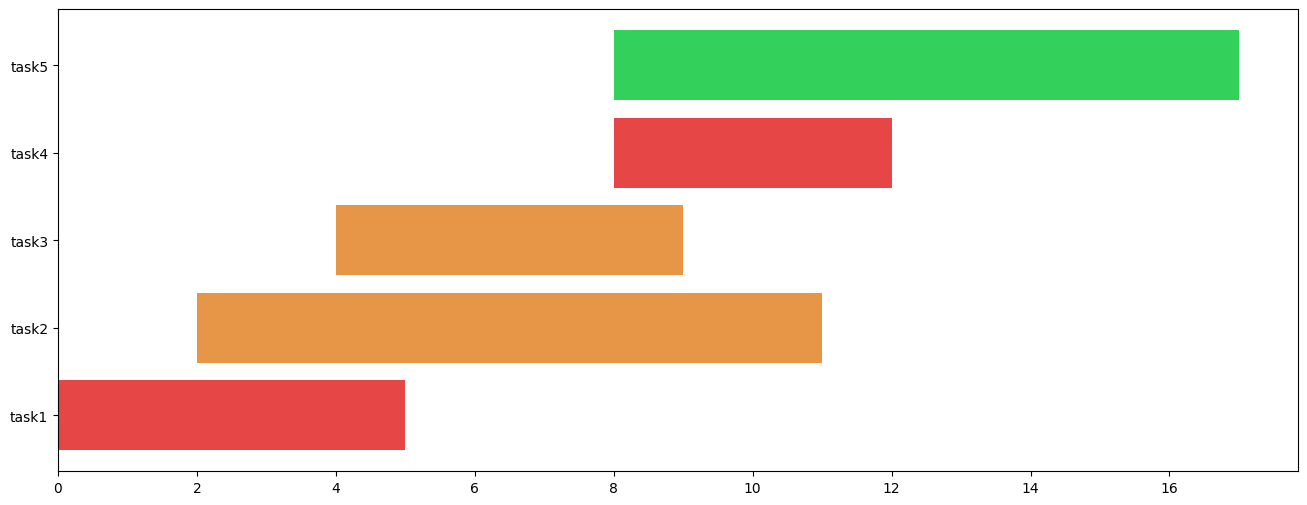

In [155]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(y=df.task, left=df.rel_start, width=df.dur, color=df.color)
plt.show()

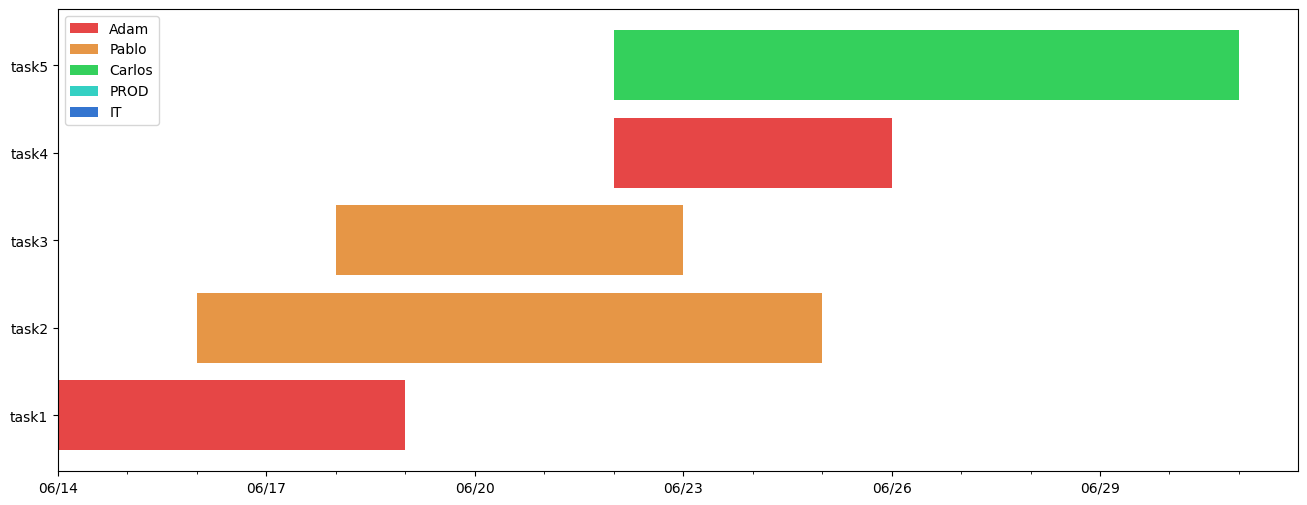

In [169]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(y=df.task, left=df.rel_start, width=df.dur, color=df.color)

colors={'Adam':'#E64646', 'Pablo':'#E69646', 'Carlos':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=colors[color], label=color) for color in colors]
plt.legend(handles=legend_elements)

xticks_minor = list(range(project_duration + 1))
xticks = xticks_minor[::3]
xticks_labels = date_range(project_start, end=project_end).strftime("%m/%d")
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])

plt.show()

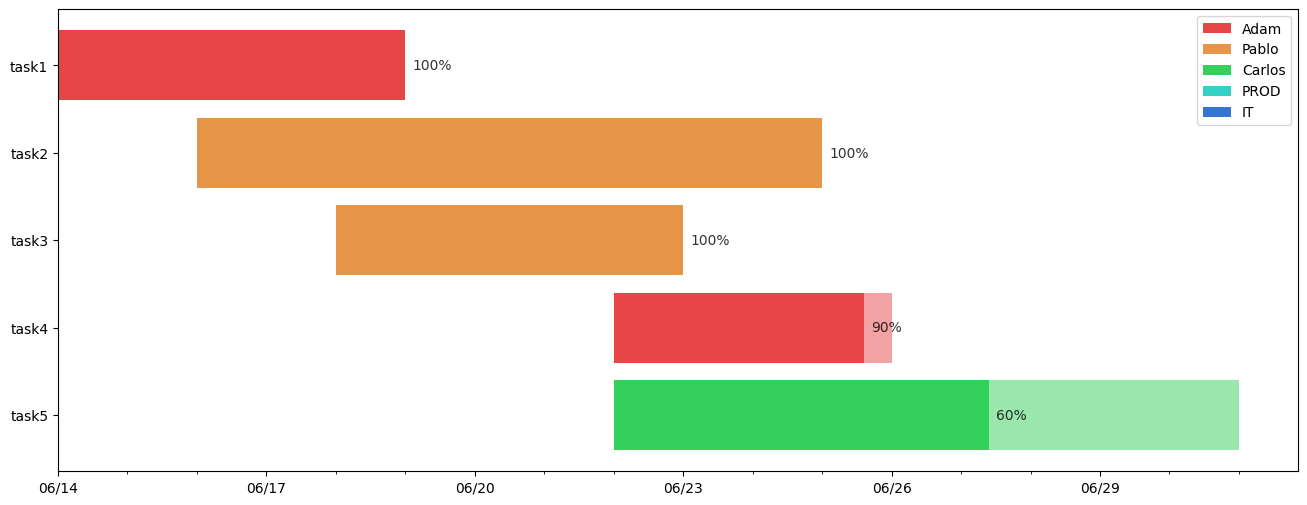

In [189]:
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(y=df.task, left=df.rel_start, width=df.dur, color=df.color, alpha=0.5)
ax.barh(y=df.task, left=df.rel_start, width=df.w_comp, color=df.color)
plt.gca().invert_yaxis()

for idx, row in df.iterrows():
    ax.text(x=row.rel_start + row.w_comp + 0.1, y=idx, s=f'{row.completion}%', va='center', alpha=0.8)
    
colors={'Adam':'#E64646', 'Pablo':'#E69646', 'Carlos':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=colors[color], label=color) for color in colors]
plt.legend(handles=legend_elements)

xticks_minor = list(range(project_duration + 1))
xticks = xticks_minor[::3]
xticks_labels = date_range(project_start, end=project_end).strftime("%m/%d")
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
# ax.set_facecolor('#222222')

plt.show()

In [ ]:
Ç